## Import necessary libraries

In [77]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import numpy as np
import pandas as pd

import os
import time
from tqdm import tqdm
from io import StringIO

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

## Load Dataset

In [78]:
df = pd.read_csv("BankNote_Authentication.csv")

print(df.shape)

df.head()

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [79]:
display_string = StringIO()

df.info(buf=display_string)

print(display_string.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB



In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [81]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Exploratory Data Analysis

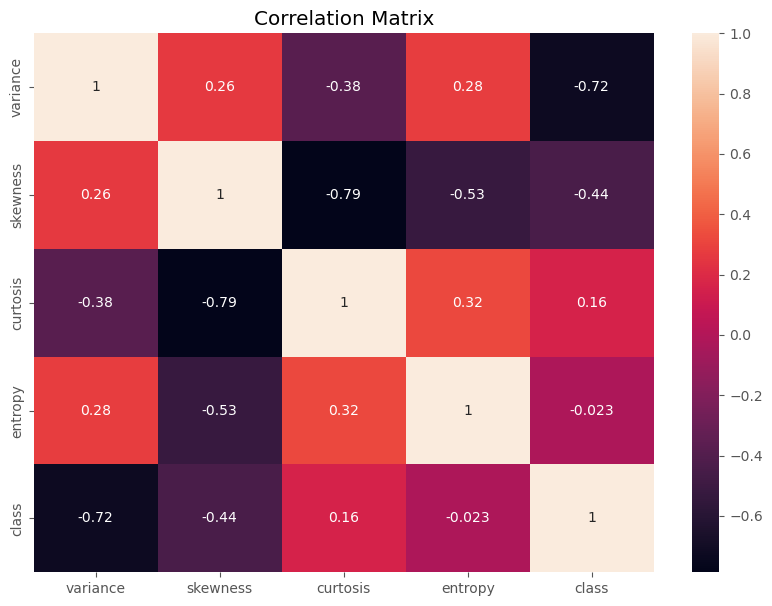

In [82]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

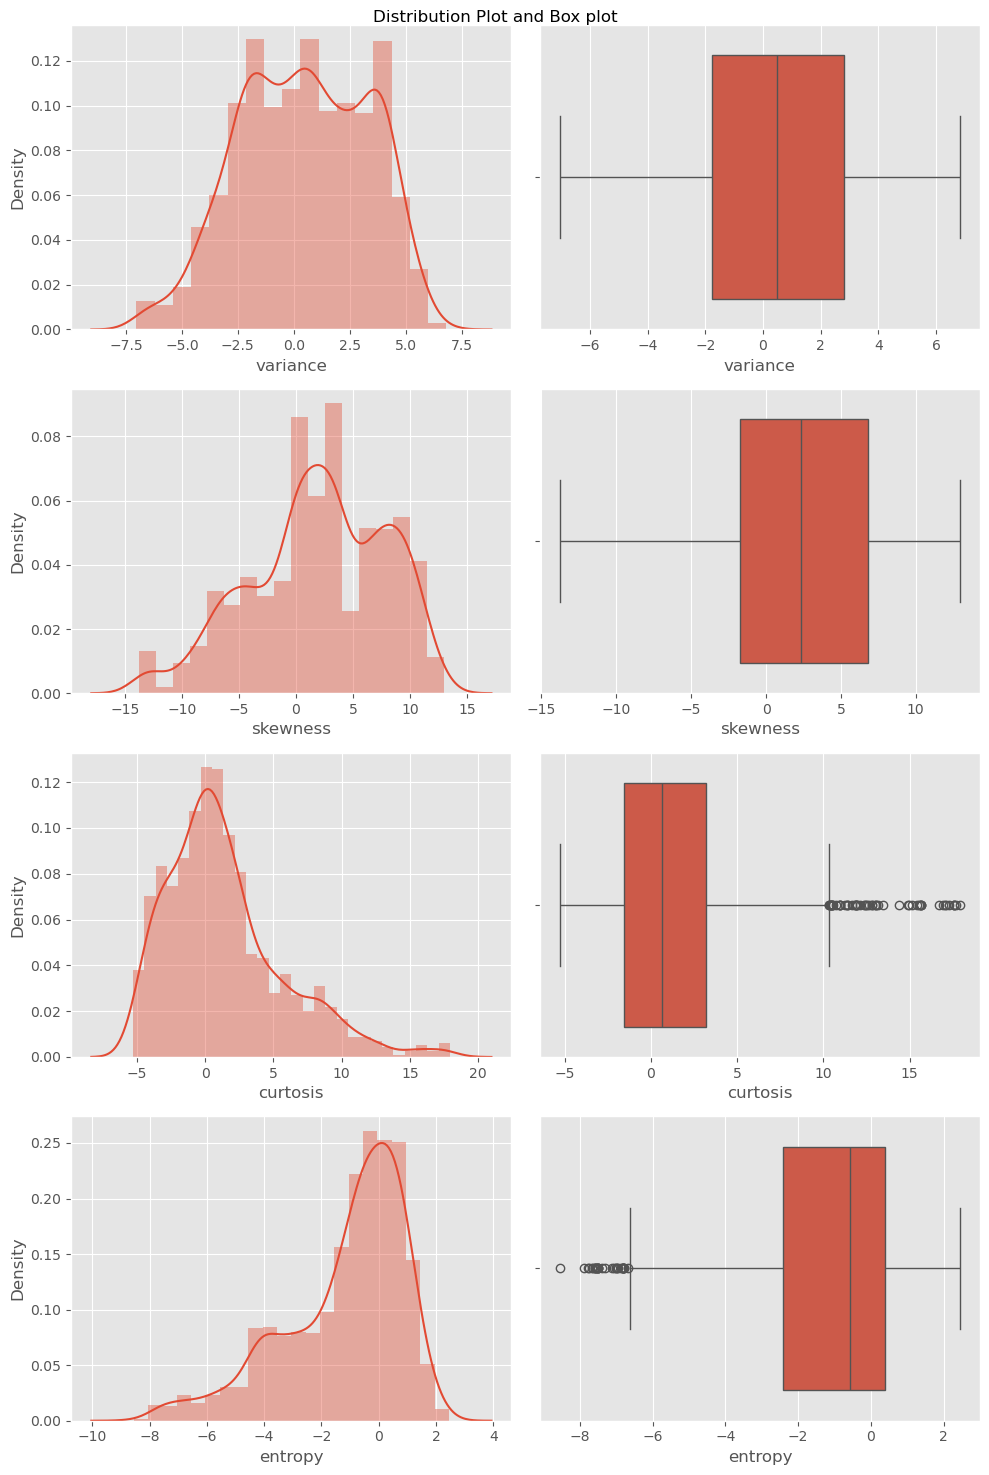

In [83]:
cols = df.columns

plt.figure(figsize=(10, 15))

plt.subplot(421)
sns.distplot(df[cols[0]])

plt.subplot(422)
sns.boxplot(x=df[cols[0]])

plt.subplot(423)
sns.distplot(df[cols[1]])

plt.subplot(424)
sns.boxplot(x=df[cols[1]])

plt.subplot(425)
sns.distplot(df[cols[2]])

plt.subplot(426)
sns.boxplot(x=df[cols[2]])

plt.subplot(427)
sns.distplot(df[cols[3]])

plt.subplot(428)
sns.boxplot(x=df[cols[3]])

plt.suptitle("Distribution Plot and Box plot")
plt.tight_layout()
plt.show()

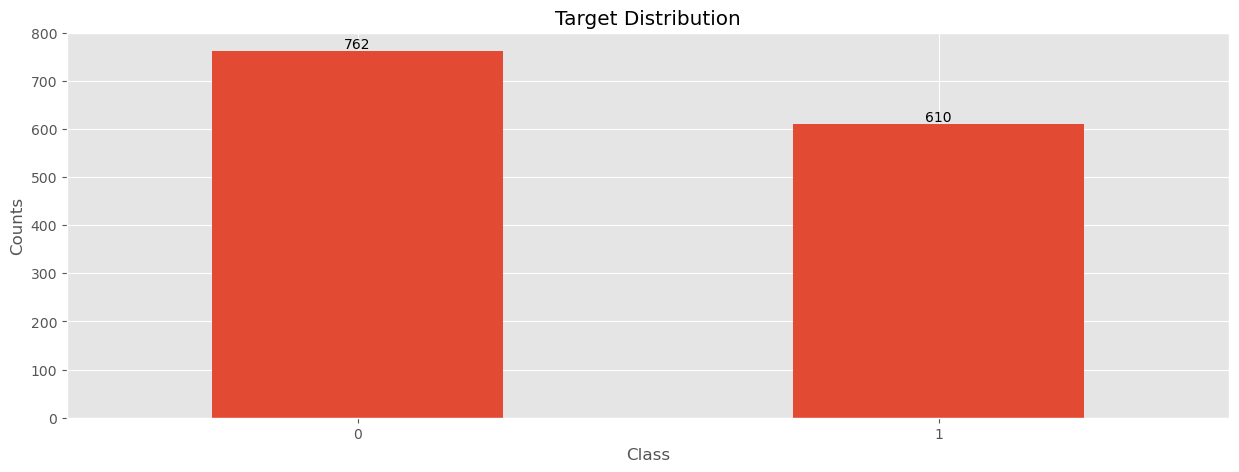

In [84]:
barplot = df["class"].value_counts().plot(kind="bar", figsize=(15, 5))
barplot.set_xlabel("Class")
barplot.set_ylabel("Counts")
barplot.set_title("Target Distribution")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=360)

for p in barplot.patches:
    h = p.get_height()
    barplot.text(p.get_x() + (p.get_width()/2), h, f"{h}", ha="center", va="bottom")

plt.show()

## Train Test Split

In [85]:
X, y = df.drop("class", axis="columns"), df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Modelling

#### LogisticRegression

In [86]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print(f"Accuracy score on training set: {lr.score(X_train, y_train)}")
print(f"Accuracy score on test set: {lr.score(X_test, y_test)}")

Accuracy score on training set: 0.9931972789115646
Accuracy score on test set: 0.9854227405247813


### RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print(f"Accuracy score on training set: {rfc.score(X_train, y_train)}")
print(f"Accuracy score on test set: {rfc.score(X_test, y_test)}")

Accuracy score on training set: 1.0
Accuracy score on test set: 0.9941690962099126


### MLPClassifier

In [88]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print(f"Accuracy score on training set: {mlp.score(X_train, y_train)}")
print(f"Accuracy score on test set: {mlp.score(X_test, y_test)}")

Accuracy score on training set: 1.0
Accuracy score on test set: 1.0


## Cross validation

### LogisticRegression cv

In [89]:
lr_cv = LogisticRegression()
cv_score_lr = cross_val_score(estimator=lr_cv, X=X, y=y, cv=5, scoring="accuracy", n_jobs=-1)
print("Cross validation score: ", np.mean(cv_score_lr))

Cross validation score:  0.9897969475779694


### RandomForestClassifier cv

In [90]:
rfc_cv = RandomForestClassifier()
cv_score_rfc = cross_val_score(estimator=rfc_cv, X=X, y=y, cv=5, scoring="accuracy", n_jobs=-1)
print("Cross validation score: ", np.mean(cv_score_rfc))

Cross validation score:  0.9934412740544127


### MLPClassifier cv

In [91]:
mlp_cv = MLPClassifier()
cv_score_mlp = cross_val_score(estimator=mlp_cv, X=X, y=y, cv=5, scoring="accuracy", n_jobs=-1)
print("Cross validation score: ", np.mean(cv_score_mlp))

Cross validation score:  1.0


## Model Evaluation

In [107]:
def timer(function):
    def wrapper(*arg, **kwarg):
        start_time = time.time()
        result = function(*arg, **kwarg)
        elapsed_time = time.time() - start_time
        print(f"Runtime: {elapsed_time}")
        return result
    return wrapper

@timer
def Make_Prediction(estimator, X, y, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    pred_per_fold = pd.DataFrame()
    for idx, (tti) in enumerate(skf.split(X, y)):
        xtrain, xtest = X.iloc[tti[0]], X.iloc[tti[1]]
        ytrain, ytest = y.iloc[tti[0]], y.iloc[tti[1]]
        
        estimator.fit(xtrain, ytrain)

        pred = estimator.predict(X_test)

        pred_per_fold[f"fold_{idx}"] = pred

    return estimator, pred_per_fold.mode(axis=1)[0]

def Plot_Confusion_Matrix(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred)

    heatmap = sns.heatmap(cm, annot=True)

    heatmap.set_xlabel("Prediction")
    heatmap.set_ylabel("Actual")
    heatmap.set_title("Confusion Matrix")
    heatmap.set_xticklabels(["Predicted -> 0", "Predicted -> 1"])
    
def Plot_ROC_Curve(y_true, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    auc_score = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, c="b", label=f"AUC: {auc_score}")
    plt.plot([0, 1], [0, 1], ls="--", c="red")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

### LogisticRegression Evaluation

In [93]:
lr_model, lr_pred = Make_Prediction(rfc_cv, X_train, y_train, X_test, y_test)

Runtime: 4.646713733673096


In [101]:
print(metrics.classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       191
           1       0.99      1.00      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



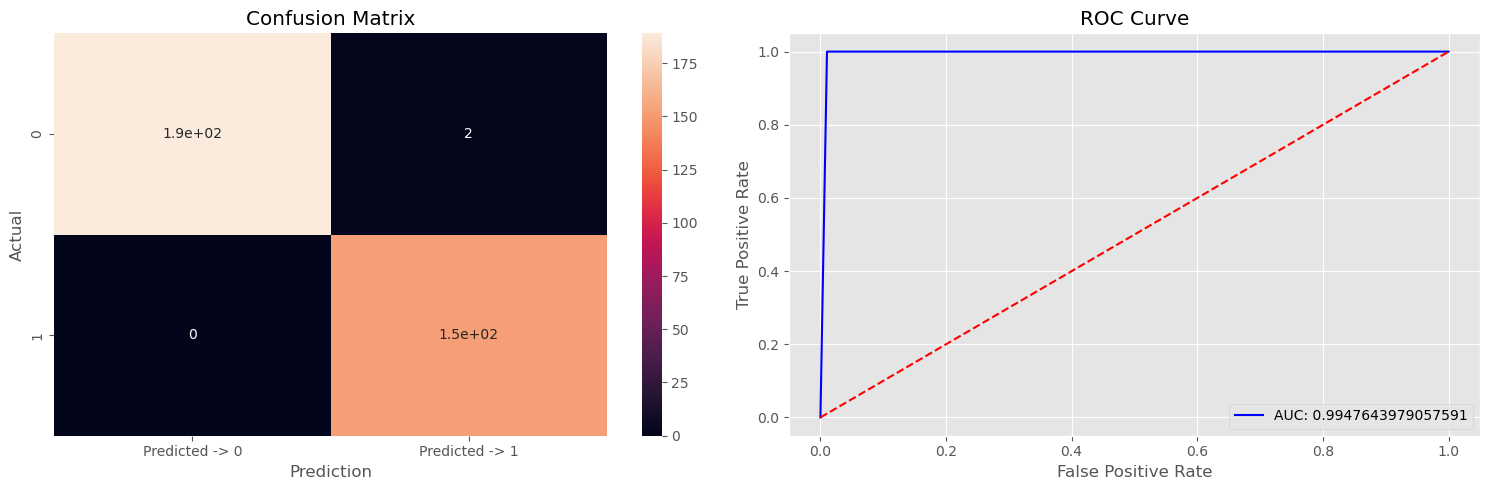

In [106]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
Plot_Confusion_Matrix(y_test, lr_pred)

plt.subplot(122)
Plot_ROC_Curve(y_test, lr_pred)

plt.tight_layout()
plt.show()

### RandomForestClassifier Evaluation

In [95]:
rfc_model, rfc_pred = Make_Prediction(rfc_cv, X_train, y_train, X_test, y_test)

Runtime: 4.7100067138671875


In [102]:
print(metrics.classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       191
           1       0.99      1.00      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



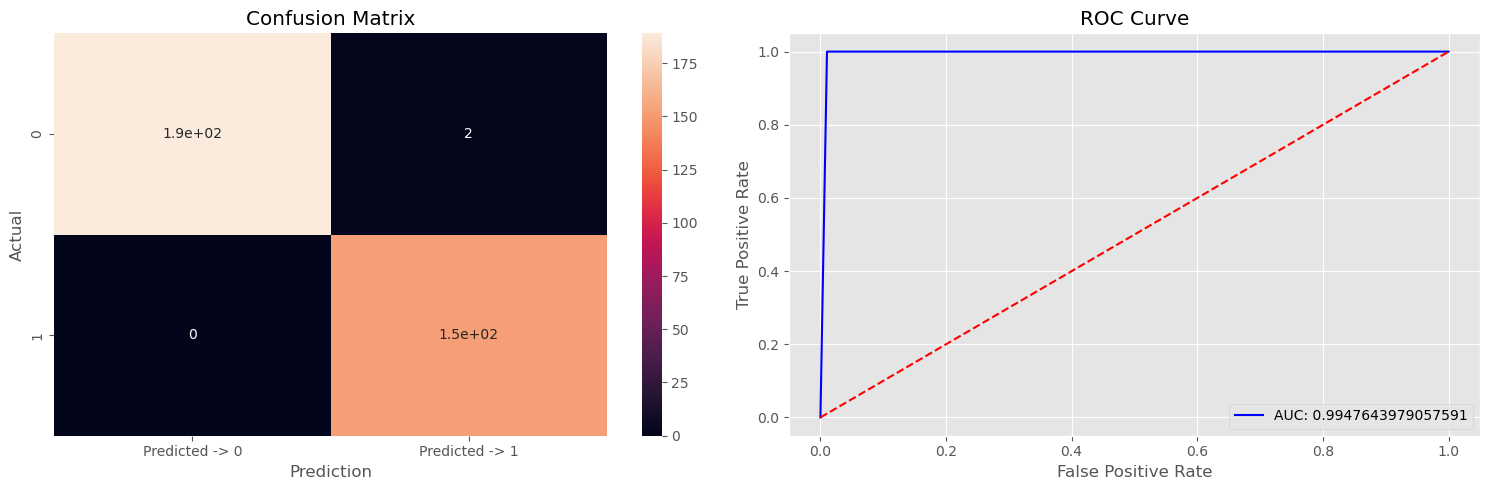

In [105]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
Plot_Confusion_Matrix(y_test, rfc_pred)

plt.subplot(122)
Plot_ROC_Curve(y_test, rfc_pred)

plt.tight_layout()
plt.show()

### MLPClassifier Evaluation

In [98]:
mlp_model, mlp_pred = Make_Prediction(mlp_cv, X_train, y_train, X_test, y_test)

Runtime: 7.237144470214844


In [103]:
print(metrics.classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



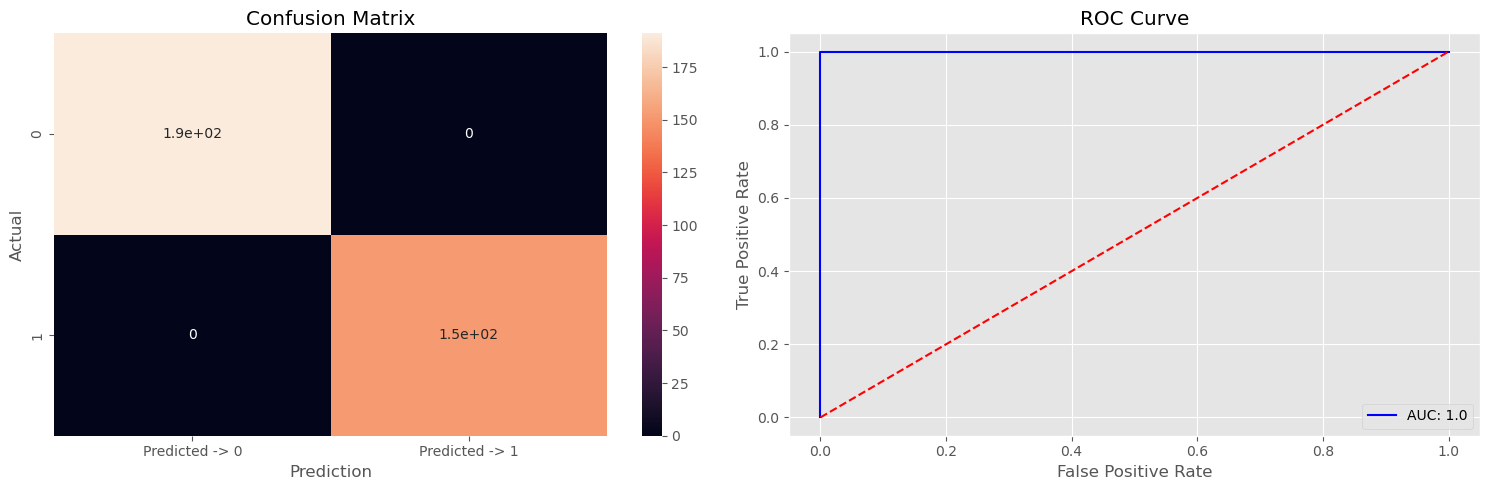

In [104]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
Plot_Confusion_Matrix(y_test, mlp_pred)

plt.subplot(122)
Plot_ROC_Curve(y_test, mlp_pred)

plt.tight_layout()
plt.show()

### Eddy